# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

## Import dataset

In [2]:
# determining the Charater-encoding of csv file

import chardet
with open('movies.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [3]:
movie = pd.read_csv('movies.csv', encoding='ISO-8859-1')
movie.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01-08-1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
# Data-type of each column

movie.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

## Null Values

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   int64  
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   int64  
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 799.3+ KB


In [6]:
# ZERO null-values across whole dataset

## Data Cleaning

In [7]:
# Re-adjusting the Release Year column

movie['year'] = movie['released'].astype(str).str[-4:]

movie.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01-08-1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [8]:
movie.sort_values( by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,18-12-2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,18-12-2009,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,19-12-1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,12-06-2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,04-05-2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,12-04-2013,104,7.2,Florian Lukas,16609,Ole Meldgaard,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,09-03-2012,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,19-01-2014,106,5.7,Jemma Dallender,21070,Neil Elman,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,01-10-1997,84,5.7,Will Friedle,5034,Andy Burg,1997


In [9]:
# deleting the Duplicate values

movie.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01-08-1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,22-07-2016,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,06-05-2016,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,25-07-2016,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,02-12-2016,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016


# Scatter plot

<AxesSubplot:xlabel='budget', ylabel='gross'>

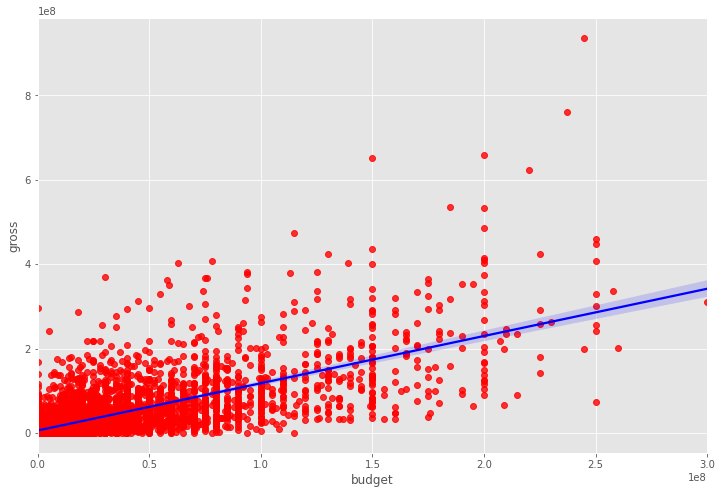

In [10]:
# creating a Regplot (scatter-plot with a Linear Regression line)

sns.regplot( x='budget', y='gross', data=movie, 
             scatter_kws={'color':'red'},
             line_kws={'color':'blue'} )

## Correlation

In [11]:
# generating Correlation matrix using Pearson-Correlation 

movie.corr()       # kendall & spearman are also options

,budget,gross,runtime,score,votes
budget,1.000000,0.712196,0.268226,0.042145,0.503924
gross,0.712196,1.000000,0.224579,0.165693,0.662457
runtime,0.268226,0.224579,1.000000,0.395343,0.317399
score,0.042145,0.165693,0.395343,1.000000,0.393607
votes,0.503924,0.662457,0.317399,0.393607,1.000000


In [12]:
# So, High Correlation between budget and gross
                 # and between votes and gross

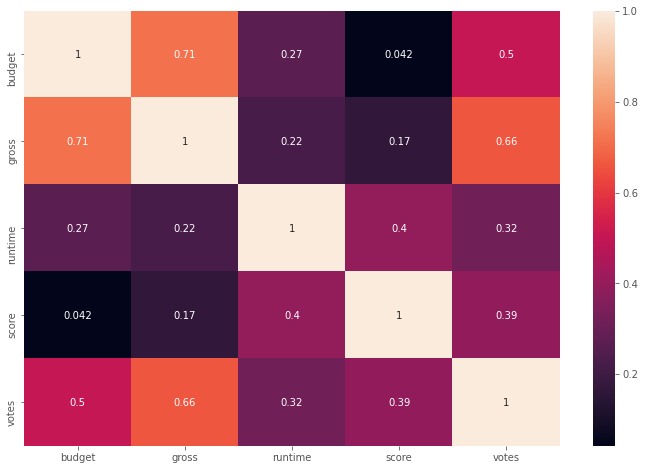

In [13]:
# generating a Heatmap using Correlation Matrix

correlation_matrix = movie.corr()

sns.heatmap( correlation_matrix, annot=True )

plt.show()

# determine the Categorical data

In [14]:
# generating Unique codes for categorical data

movie_num = movie

for col in movie_num.columns:
    if( movie_num[col].dtype == 'object' ):
        movie_num[col] = movie_num[col].astype('category')
        movie_num[col] = movie_num[col].cat.codes
        
movie_num.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,665,54,2192,1,52287414,4661,8,1710,89,8.1,2454,299174,3716,15
1,6000000,1680,54,1296,4,70136369,1821,7,778,103,7.8,1605,264740,1970,15
2,15000000,1680,54,2645,0,179800601,6203,6,1169,110,6.9,2345,236909,1852,15
3,18500000,2062,54,1066,0,85160248,295,8,1341,137,8.4,2192,540152,1629,15
4,9000000,2122,54,2123,1,18564613,1872,6,46,90,6.9,1139,36636,2549,15


In [15]:
# Correlation matrix of complete dataset

movie_num.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,-0.001867,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.263932
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.001410,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.023838
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.005216,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.060556
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001156,0.026779,0.017130,0.039813,0.000639,0.298997,-0.006341
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,0.008028,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.031684
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,-0.008919,0.224579,0.165693,0.008382,0.662457,-0.009455,0.168175
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.018485,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024241
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,-0.016739,0.079542,0.019271,0.007893,0.011678,0.010740,0.018358
released,-0.001867,0.001410,-0.005216,0.001156,0.008028,-0.008919,0.018485,-0.016739,1.000000,0.006679,0.004861,0.005813,-0.007406,0.011352,0.011080
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.006679,1.000000,0.395343,0.016019,0.317399,0.000759,0.083724


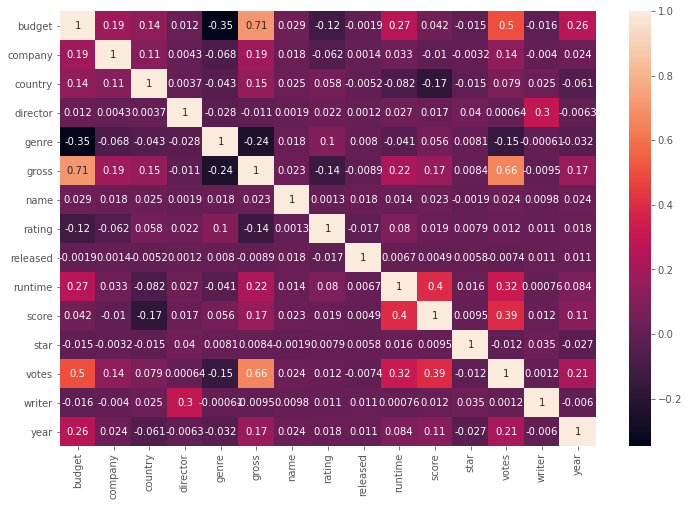

In [16]:
corr_matrix = movie_num.corr()

sns.heatmap( corr_matrix, annot=True )

plt.show()

In [17]:
# Correlation pairs with correlation > 0.5

x = corr_matrix.unstack().sort_values()
print( x[ x>0.5 ])

votes     budget      0.503924
budget    votes       0.503924
gross     votes       0.662457
votes     gross       0.662457
gross     budget      0.712196
budget    gross       0.712196
          budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64


In [18]:
# Highest Correlation is between budget and gross
                #  then, between votes and gross
                #  then, betwee votes and budget